# Data Exploration
Exploring our model features and target variable 

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import seaborn as sns

import os
dp = os.environ.get('pub_data')


In [6]:
# Read dataset
data = pd.read_csv(dp + 'giteval.csv',index_col=0)
print(len(data))
data.head()

230


,repos,stars,followers,following,foll_ratio,lang,n_lang,org_flag,n_cont,last_cont,stab_cont,cont_repo_ratio,r1,r2,y
0,71,306,106,9,11.78,"['JavaScript', 'PHP', 'CSS', 'Ruby', 'Shell', ...",10,1,437,0,0.25,6.15,3.5,4.5,4.0
1,0,0,0,1,0.00,[],0,0,1,159,0.00,0.00,0.0,0.0,0.0
2,12,1,182,0,-1.00,"['JavaScript', 'PHP', 'CSS', 'Ruby', 'Shell']",5,0,433,3,0.23,36.08,4.0,3.0,3.5
3,13,31,0,17,0.00,"['PHP', 'HTML', 'JavaScript']",3,0,20,0,0.50,1.54,2.0,2.0,2.0
4,99,344,370,16,23.12,"['C', 'JavaScript', 'Go', 'CMake', 'Jupyter No...",10,0,255,6,0.02,2.58,5.0,3.0,4.0


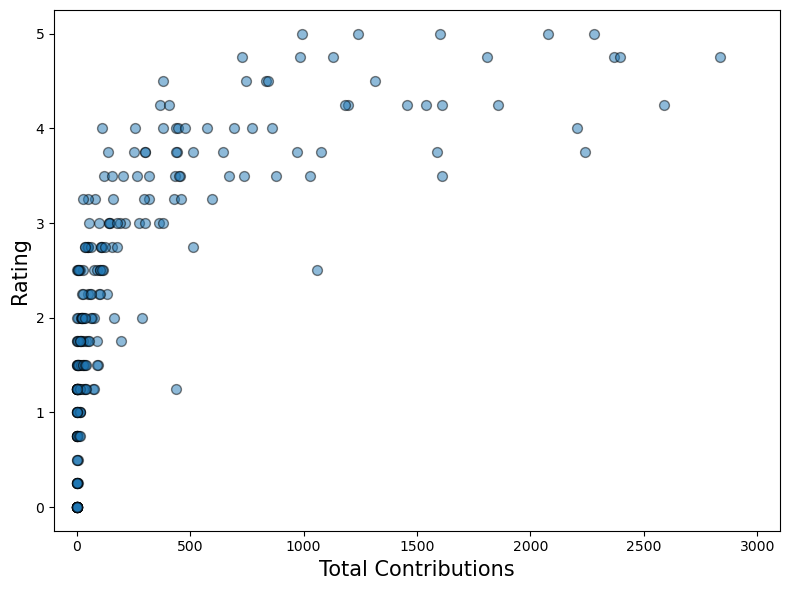

In [7]:
# Contributions
plt.subplots(nrows=1, ncols=1,figsize=(8,6))

plt.scatter(data['n_cont'],data['y'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')
plt.xlabel("Total Contributions",size=15)
plt.ylabel('Rating',size=15)
plt.xlim(-100,3100)

plt.tight_layout()
plt.savefig('../../figures/cont_rating.png',format='png',dpi=150)

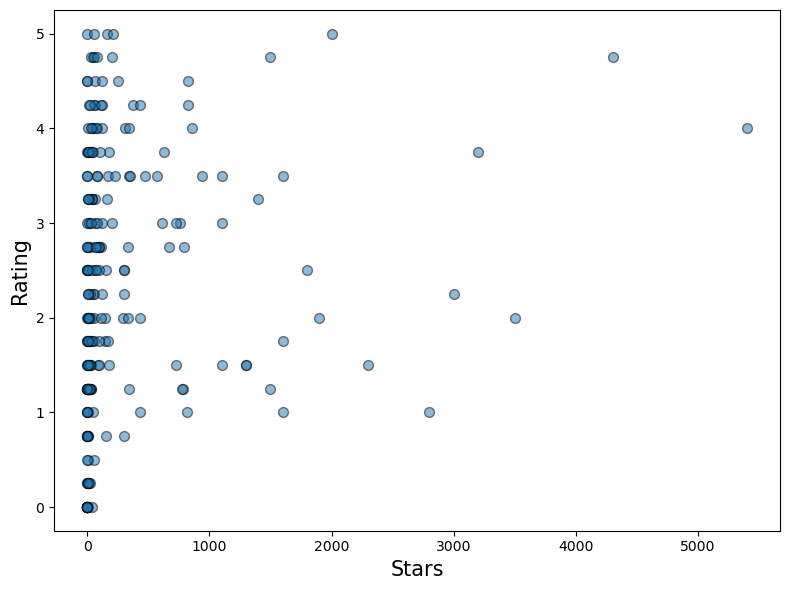

In [9]:
# Stars
plt.subplots(nrows=1, ncols=1,figsize=(8,6))

plt.scatter(data['stars'],data['y'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')
plt.xlabel("Stars",size=15)
plt.ylabel('Rating',size=15)

plt.tight_layout()
plt.savefig('../../figures/stars_rating.png',format='png',dpi=150)

1.8487654320987654 3.448529411764706


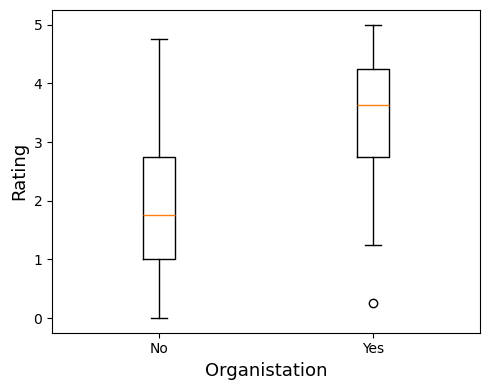

In [10]:
# Organisation 
org_0 = data[data.org_flag == 0]['y']
org_1 = data[data.org_flag == 1]['y']
print(np.mean(org_0),np.mean(org_1))
org = [org_0,org_1]
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,4))


ax.boxplot(org,labels=['No','Yes'])
plt.ylabel("Rating",size=13)
plt.xlabel('Organistation',size=13)
plt.tight_layout()
plt.savefig('../../figures/org_rating.png',format='png',dpi=150)

0.6976744186046512
0.20320855614973263


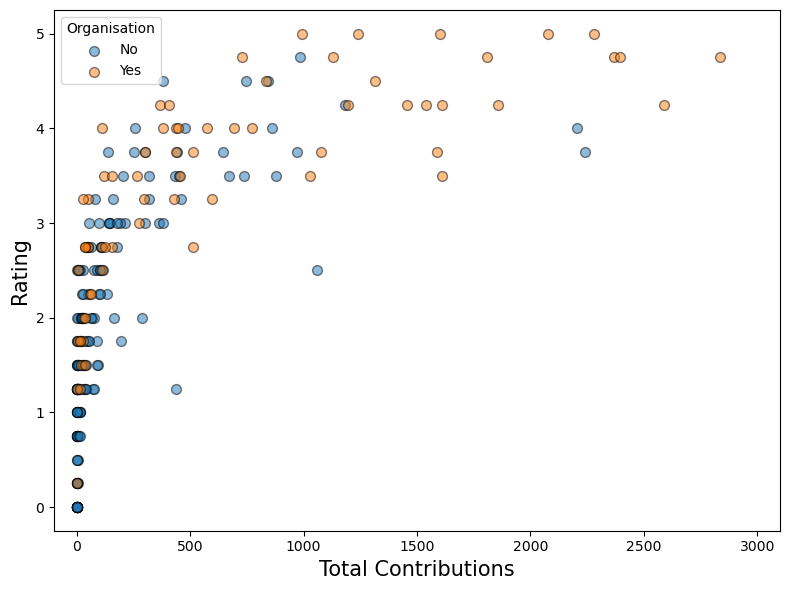

In [11]:
# Organisation and contributions
print(np.mean(data[data.n_cont>=500]['org_flag']))
print(np.mean(data[data.n_cont<500]['org_flag']))

plt.subplots(nrows=1, ncols=1,figsize=(8,6))

plt.scatter('n_cont','y',data=data[data.org_flag==0], s=50,alpha=0.5,edgecolors='#000000',label = 'No')
plt.scatter('n_cont','y',data=data[data.org_flag==1], s=50,alpha=0.5,edgecolors='#000000',label = 'Yes')

#plt.plot(cont_stats['n_cont']['mean'],'r--',label='Mean')
plt.xlabel("Total Contributions",size=15)
plt.ylabel('Rating',size=15)
plt.xlim(-100,3100)
plt.legend(loc= 2,prop={'size': 10},title='Organisation')

plt.tight_layout()
plt.savefig('../../figures/org_cont.png',format='png',dpi=150)